In this notebook, we will identify candidate traces from the Dataport repo for our experiment.

In [33]:
import pandas as pd

Load the `metadata` view/document from Dataport.

In [34]:
df = pd.read_csv('dataport-metadata.csv')

Number of records it contains:

In [35]:
df.shape[0]

1436

How does it look like?

In [36]:
df.head()

,dataid,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
0,2836,NaN,Single-Family Home,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2743,NaN,Single-Family Home,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5323,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8560,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3313,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Set the proper index.

In [37]:
df.set_index('dataid', inplace=True)

In [38]:
df.head()

,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,city,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
dataid,,,,,,,,,,,,,,,,,,,,,
2836,NaN,Single-Family Home,NaN,NaN,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2743,NaN,Single-Family Home,NaN,NaN,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5323,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8560,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3313,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What columns do we have?

In [39]:
list(df.columns)

['active_record',
 'building_type',
 'program_579',
 'program_baseline',
 'program_energy_internet_demo',
 'program_lg_appliance',
 'program_verizon',
 'program_ccet_group',
 'program_civita_group',
 'city',
 'state',
 'pv',
 'date_enrolled',
 'date_withdrawn',
 'house_construction_year',
 'total_square_footage',
 'first_floor_square_footage',
 'second_floor_square_footage',
 'third_floor_square_footage',
 'half_floor_square_footage',
 'lower_level_square_footage',
 'audit_2011',
 'audit_2013_2014',
 'survey_2011',
 'survey_2012',
 'survey_2013',
 'survey_2014',
 'number_of_nests',
 'indoor_temp_min_time',
 'indoor_temp_max_time',
 'gas_ert_min_time',
 'gas_ert_max_time',
 'water_ert_min_time',
 'water_ert_max_time',
 'egauge_min_time',
 'egauge_max_time',
 'use',
 'grid',
 'gen',
 'air1',
 'air2',
 'air3',
 'airwindowunit1',
 'aquarium1',
 'bathroom1',
 'bathroom2',
 'bedroom1',
 'bedroom2',
 'bedroom3',
 'bedroom4',
 'bedroom5',
 'car1',
 'clotheswasher1',
 'clotheswasher_dryg1',
 'd

We wish to filter by:
* `building_type`,
* `city`,
* whether a solar PV system is installed (`pv`),
* and whether eGauge data is present (`egauge_min_time`, `egauge_max_time`) for the PV-generated power (`gen`), the grid power (`grid`), and the whole home electricity use (`use`).

Let's look at the possible values for each of these criteria.

See: https://chrisalbon.com/python/pandas_list_unique_values_in_column.html

In [40]:
df['building_type'].unique()

array(['Single-Family Home', 'Town Home', 'Apartment', 'Mobile Home',
       'Sales'], dtype=object)

In [41]:
df['city'].unique()

array(['Austin', 'Georgetown', 'Dallas', 'Houston', 'Fort Worth',
       'Benbrook', 'Willow Park', 'Weatherford', 'North Richland Hills',
       'Argyle', 'Bedford', 'Grapevine', 'Hurst', 'Waxahachie',
       'Grand Prairie', 'Arlington', 'Flower Mound', 'Richardson',
       'Southlake', 'Tolar', 'Cedar Hill', 'Mansfield', 'Kingwood',
       'Burleson', 'Santa Fe', 'Irving', 'Kennedale', 'Plano', 'Rowlett',
       'Round Rock', 'Coppell', 'Wichita Falls', 'Allen', 'Bellaire',
       'Midland', 'Colleyville', 'Katy', 'Sugar Land', 'Frisco', 'Spring',
       'Euless', 'Carrollton', 'Haslet', 'Baytown', 'Richmond', 'Humble',
       'Sherman', 'Sulphur Springs', 'Temple', 'Waco', 'Pflugerville',
       'Little Elm', 'Brownwood', 'Flint', 'Freeport', 'Pottsboro',
       'Taylor', 'Gainesville', 'Haltom City', 'Tomball', 'Friendswood',
       'Heath', 'The Colony', 'Hutchins', 'Galveston', 'Pearland',
       'Addison', 'Ennis', 'Aledo', 'Cypress', 'Killeen', 'El Lago',
       'Mesquite', 'F

In [42]:
df['pv'].unique()

array([nan, 'yes'], dtype=object)

In [43]:
df['gen'].unique()

array([nan, 'yes'], dtype=object)

In [44]:
df['grid'].unique()

array([nan, 'yes'], dtype=object)

In [45]:
df['use'].unique()

array([nan, 'yes'], dtype=object)

The following checks are from: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

In [46]:
df['egauge_min_time'].isnull().values.any()

True

In [47]:
df['egauge_max_time'].isnull().values.any()

True

So there are `NaN` values in those columns.

We will need to eliminate the corresponding rows.

Let us now set our criteria.

In [48]:
choose_building_type = df['building_type'] == 'Single-Family Home'
choose_city = df['city'] == 'Austin'
choose_egauge_types = (df['pv'] == 'yes') & (df['gen'] == 'yes') & (df['grid'] == 'yes') & (df['use'] == 'yes')

In [49]:
df_candidate = df[choose_building_type & choose_city & choose_egauge_types].copy()

How does it look like?

In [50]:
df_candidate.head()

,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,city,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
dataid,,,,,,,,,,,,,,,,,,,,,
1114,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8872,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,CCET - Control,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,CCET - Control,NaN,Austin,...,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN
8047,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,Austin,...,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
8597,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,CCET - UT Text,NaN,Austin,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of records it contains:

In [51]:
df_candidate.shape[0]

234

Keep only the columns of interest.

In [52]:
df_candidate = df_candidate[['city', 'building_type', 'total_square_footage', 'house_construction_year', 'egauge_min_time', 'egauge_max_time']]

How does it look like?

In [53]:
df_candidate.head()

,city,building_type,total_square_footage,house_construction_year,egauge_min_time,egauge_max_time
dataid,,,,,,
1114,Austin,Single-Family Home,2122.0,2007.0,NaN,NaN
8872,Austin,Single-Family Home,1422.0,2008.0,2012-05-02 01:00:00-05,2013-06-10 00:59:00-05
1464,Austin,Single-Family Home,2345.0,2007.0,2012-10-19 19:00:00-05,2014-03-05 17:59:00-06
8047,Austin,Single-Family Home,3245.0,2009.0,2013-04-16 00:00:00-05,2014-04-07 00:00:00-05
8597,Austin,Single-Family Home,2122.0,2008.0,2012-10-26 19:00:00-05,2014-10-21 18:59:00-05


Filter out the rows with `Nan` values in the eGauge columns.

See: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan#comment37529107_13434501

In [54]:
df_candidate.dropna(subset=['egauge_min_time', 'egauge_max_time'], inplace=True)

Confirm the result.

See: https://stackoverflow.com/a/29530559/2363529

In [55]:
df_candidate.notnull().any().any()

True

How does it look?

In [56]:
df_candidate.head()

,city,building_type,total_square_footage,house_construction_year,egauge_min_time,egauge_max_time
dataid,,,,,,
8872,Austin,Single-Family Home,1422.0,2008.0,2012-05-02 01:00:00-05,2013-06-10 00:59:00-05
1464,Austin,Single-Family Home,2345.0,2007.0,2012-10-19 19:00:00-05,2014-03-05 17:59:00-06
8047,Austin,Single-Family Home,3245.0,2009.0,2013-04-16 00:00:00-05,2014-04-07 00:00:00-05
8597,Austin,Single-Family Home,2122.0,2008.0,2012-10-26 19:00:00-05,2014-10-21 18:59:00-05
7982,Austin,Single-Family Home,1720.0,2007.0,2013-02-22 18:00:00-06,2014-11-13 17:59:00-06


Sort by `dataid`.

See: https://stackoverflow.com/a/22211821/2363529

In [57]:
df_candidate.sort_index(inplace=True)

In [58]:
df_candidate.head()

,city,building_type,total_square_footage,house_construction_year,egauge_min_time,egauge_max_time
dataid,,,,,,
26,Austin,Single-Family Home,2075.0,2008.0,2012-11-02 19:00:00-05,2017-12-02 03:59:00-06
77,Austin,Single-Family Home,2669.0,2009.0,2014-06-06 00:00:00-05,2017-07-23 03:34:00-05
93,Austin,Single-Family Home,2934.0,1993.0,2012-12-08 18:00:00-06,2017-12-02 02:59:00-06
114,Austin,Single-Family Home,1842.0,2008.0,2013-10-15 19:00:00-05,2017-12-02 02:31:00-06
171,Austin,Single-Family Home,2376.0,2008.0,2012-05-02 19:00:00-05,2017-12-02 02:59:00-06


In [59]:
df_candidate.dtypes

city                        object
building_type               object
total_square_footage       float64
house_construction_year    float64
egauge_min_time             object
egauge_max_time             object
dtype: object

Convert `egauge_min_time` and `egauge_max_time` columns to `datetime` objects.

See:
https://stackoverflow.com/a/35630179/2363529
https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime#comment74177401_26763793

In [60]:
df_candidate['egauge_min_time'] = pd.to_datetime(df_candidate['egauge_min_time'])
df_candidate['egauge_max_time'] = pd.to_datetime(df_candidate['egauge_max_time'])

In [61]:
df_candidate.head()

,city,building_type,total_square_footage,house_construction_year,egauge_min_time,egauge_max_time
dataid,,,,,,
26,Austin,Single-Family Home,2075.0,2008.0,2012-11-03 00:00:00,2017-12-02 09:59:00
77,Austin,Single-Family Home,2669.0,2009.0,2014-06-06 05:00:00,2017-07-23 08:34:00
93,Austin,Single-Family Home,2934.0,1993.0,2012-12-09 00:00:00,2017-12-02 08:59:00
114,Austin,Single-Family Home,1842.0,2008.0,2013-10-16 00:00:00,2017-12-02 08:31:00
171,Austin,Single-Family Home,2376.0,2008.0,2012-05-03 00:00:00,2017-12-02 08:59:00


Plot the data IDs against their corresponding segments.

Assume a `dataid` which starts at `egauge_min_time` and ends at `egauge_max_time`.

We want a straight line that starts at (egauge_min_time, data_id) and (egauge_max_time, data_id).

See:
http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
https://github.com/jakevdp/WhirlwindTourOfPython/blob/933b1c1507f443ea57bcb486fe5cd4cadfb377de/15-Preview-of-Data-Science-Tools.ipynb

In [62]:
xs = zip(df_candidate['egauge_min_time'], df_candidate['egauge_max_time'])
ys = zip(df_candidate.index.values, df_candidate.index.values)

In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


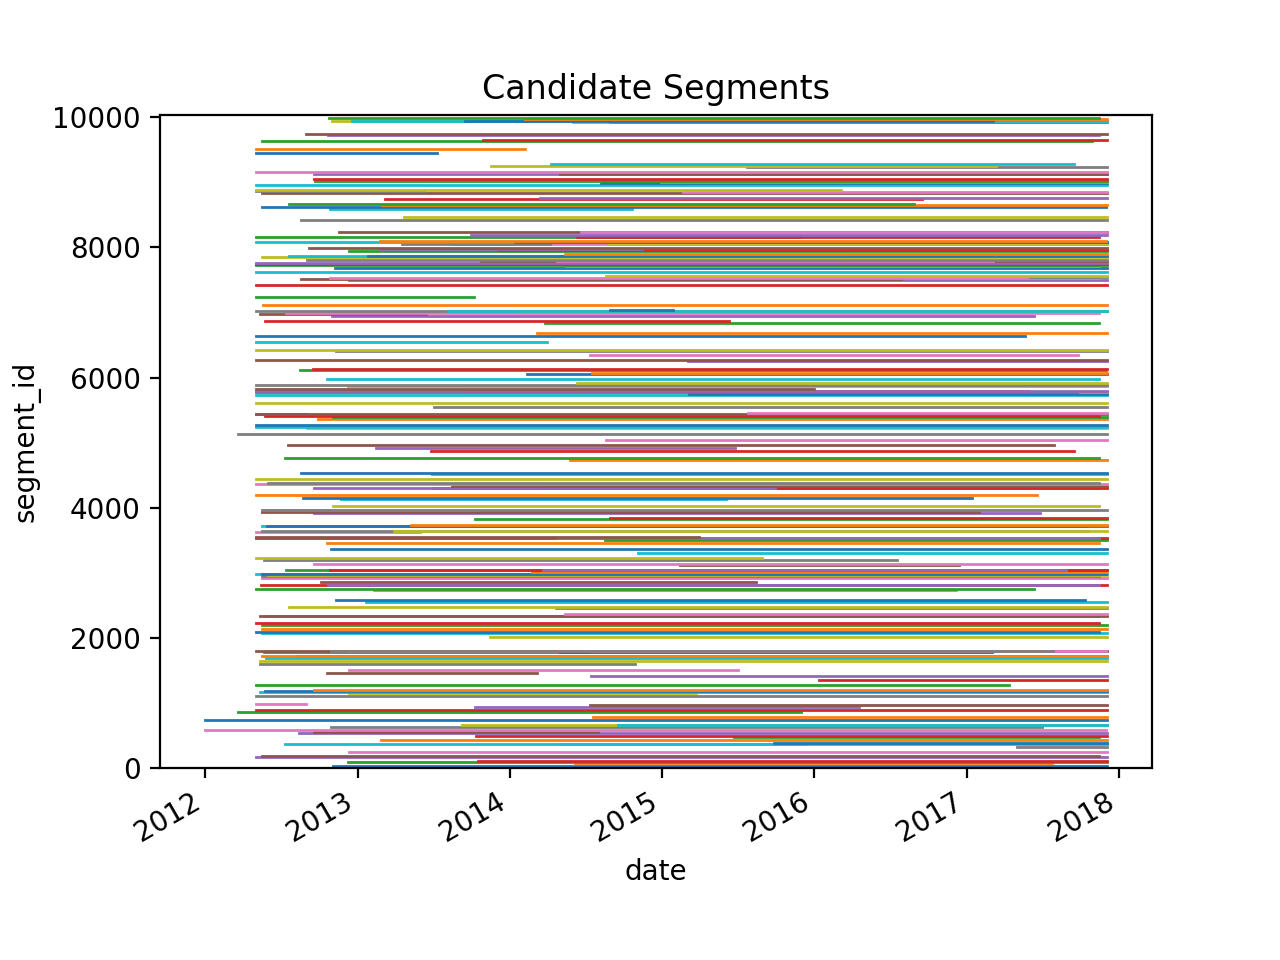

In [64]:
fig, ax = plt.subplots()
ax.set(xlabel='date', ylabel='data_id', title='eGauge traces for candidate houses')
y_padding = 50
ax.set(ylim=[max([min(df_candidate.index.values-y_padding),0]), max(df_candidate.index.values+y_padding)])

for x, y in zip(xs, ys):
    ax.plot(x, y, linewidth=1)
fig.autofmt_xdate() # from: https://pythonspot.com/en/plot-time-with-matplotlib/

As the figure above shows, it is practically impossible to to tell the most significant overlaps, both in terms of duration and number of data IDs.

This is what we will attempt to extract programmatically in the following notebook in this series.

Store the resulting artifacts to disk.

See: https://matplotlib.org/tutorials/introductory/lifecycle.html#saving-our-plot

In [65]:
fig.savefig('01-segments-candidate-plot.eps')

In [66]:
df_candidate.to_csv('01-segments-candidate.csv')